In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Example usage
# df=pd.read_excel("/content/drive/MyDrive/MSCI-623/default of credit card clients.xls", index_col=False)
df=pd.read_csv("/content/drive/MyDrive/MSCI-623/UCI_Credit_Card.csv", index_col=False)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# df = df.drop(labels=0, axis=0)

In [ ]:
# rename outcome variable in an acceptable format to minimize any issues that might arise afterwards
df.rename(columns={"default.payment.next.month": "def_pay", "PAY_0": "PAY_1"}, inplace=True)

In [ ]:
df.shape

(30000, 25)

In [ ]:
# converting datatypes from object to numeric
# df = df.astype(int)

In [ ]:
df.dtypes

ID             int64
LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
def_pay        int64
dtype: object

In [ ]:
# Had to rename 1st column name to 'ID' as lightGBMpredict was giving error stating unable to process non utf-8 char in column name
# df.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

In [ ]:
# Issue: We could see our dataset looked to be highly unstable thus we now use SMOTE function. SMOTE function is used to upscale low section
# of data and it balances out the other data.

# This one function can be used to do the whole metrics process we tried in Notebook #1
def Model_with_SMOTE(df):
    # Split the dataframe into train, test, and validation sets
    X = df.drop(['def_pay'], axis=1)
    y = df['def_pay']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Use SMOTE technique to resample the unbalanced data in the training set
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Fit models using DecisionTreeClassifier, KNeighborsClassifier, and RandomForestClassifier
    models = [
        ("Decision Tree", DecisionTreeClassifier()),
        ("K-Nearest Neighbors", KNeighborsClassifier()),
        ("Random Forest", RandomForestClassifier()),
        ("Logistic Regression", LogisticRegression(max_iter=1000))
    ]

    for name, model in models:
        print(f"Training {name}...")
        model.fit(X_train_resampled, y_train_resampled)

        # Fine-tune the model using the validation dataset
        y_val_pred = model.predict(X_val)

        # Predict using the test dataset
        y_test_pred = model.predict(X_test)

        # Print accuracy, precision, recall, f1-score, kappa, confusion matrix
        print(f"\n{name} Model Metrics:")
        print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
        print(f"Precision: {precision_score(y_test, y_test_pred)}")
        print(f"Recall: {recall_score(y_test, y_test_pred)}")
        print(f"F1-Score: {f1_score(y_test, y_test_pred)}")
        print(f"Kappa: {cohen_kappa_score(y_test, y_test_pred)}")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}")

        # Plot ROC curve and calculate AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {name}')
        plt.legend(loc="lower right")
        plt.show()

        # Print classification report
        print(f"\nClassification Report for {name}:")
        print(classification_report(y_test, y_test_pred))
        print("--------------------------------------")


Training Decision Tree...

Decision Tree Model Metrics:
Accuracy: 0.6754444444444444
Precision: 0.32734459216672657
Recall: 0.46479591836734696
F1-Score: 0.38414505587181114
Kappa: 0.17272018941620582
Confusion Matrix:
[[5168 1872]
 [1049  911]]


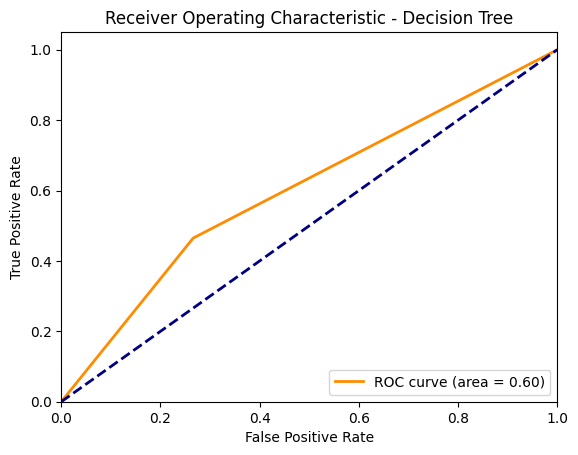


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      7040
           1       0.33      0.46      0.38      1960

    accuracy                           0.68      9000
   macro avg       0.58      0.60      0.58      9000
weighted avg       0.72      0.68      0.69      9000

--------------------------------------
Training K-Nearest Neighbors...

K-Nearest Neighbors Model Metrics:
Accuracy: 0.5923333333333334
Precision: 0.27833981841763944
Recall: 0.5474489795918367
F1-Score: 0.36904557179707653
Kappa: 0.11289672625284097
Confusion Matrix:
[[4258 2782]
 [ 887 1073]]


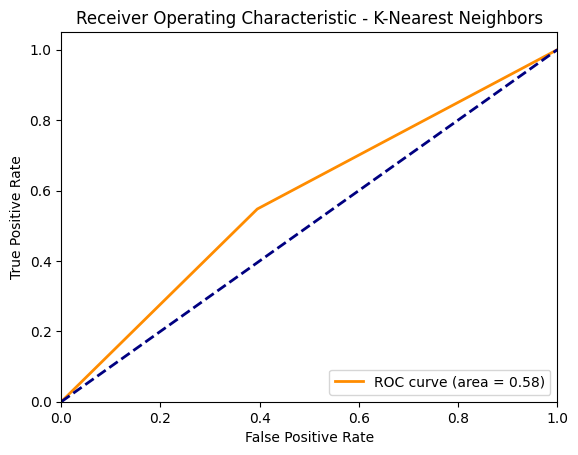


Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.83      0.60      0.70      7040
           1       0.28      0.55      0.37      1960

    accuracy                           0.59      9000
   macro avg       0.55      0.58      0.53      9000
weighted avg       0.71      0.59      0.63      9000

--------------------------------------
Training Random Forest...

Random Forest Model Metrics:
Accuracy: 0.7834444444444445
Precision: 0.5029270888770623
Recall: 0.48214285714285715
F1-Score: 0.4923157072154207
Kappa: 0.354762055403431
Confusion Matrix:
[[6106  934]
 [1015  945]]


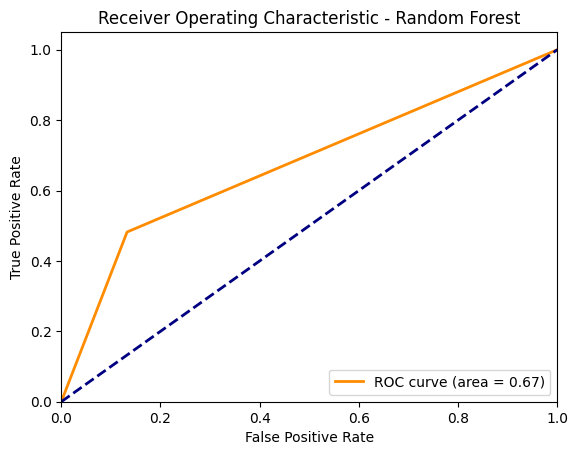


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7040
           1       0.50      0.48      0.49      1960

    accuracy                           0.78      9000
   macro avg       0.68      0.67      0.68      9000
weighted avg       0.78      0.78      0.78      9000

--------------------------------------
Training Logistic Regression...

Logistic Regression Model Metrics:
Accuracy: 0.564
Precision: 0.29541666666666666
Recall: 0.7234693877551021
F1-Score: 0.41952662721893497
Kappa: 0.15962307252998276
Confusion Matrix:
[[3658 3382]
 [ 542 1418]]


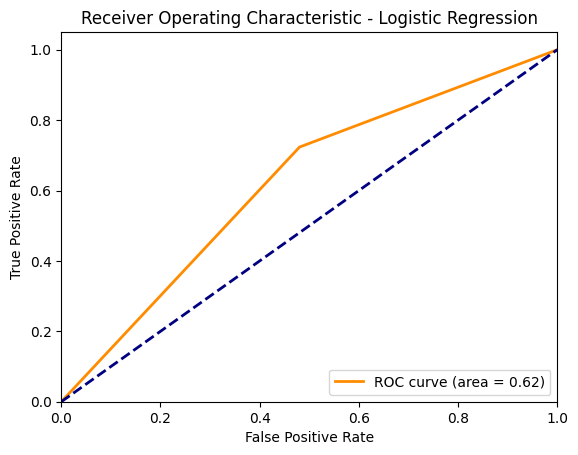


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.52      0.65      7040
           1       0.30      0.72      0.42      1960

    accuracy                           0.56      9000
   macro avg       0.58      0.62      0.54      9000
weighted avg       0.75      0.56      0.60      9000

--------------------------------------


In [ ]:
Model_with_SMOTE(df)